# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1194.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.28e-43
Time:                        12:33:05   Log-Likelihood:                 6.2889
No. Observations:                  50   AIC:                            -4.578
Df Residuals:                      46   BIC:                             3.070
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0009      0.076     65.956      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.52666338  4.98121249  5.40039266  5.75992845  6.04430529  6.24931851
  6.38276412  6.46315796  6.51669361  6.57293886  6.65997777  6.79979659
  7.00467144  7.27515142  7.59996835  7.95788812  8.32119939  8.66026651
  8.94839853  9.16623448  9.30492431  9.36758293  9.36877844  9.33213863
  9.28646901  9.26102013  9.28068181  9.3618938   9.50994481  9.71810355
  9.96872466 10.23614784 10.49091372 10.70460395 10.85451031 10.92736552
 10.9215231  10.84722782 10.72493255 10.58193789 10.44790679 10.34999096
 10.30836997 10.33293577 10.42166751 10.5609635  10.72787598 10.89388137
 11.02956657 11.10946151]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.10677783 10.98589808 10.76429026 10.48176177 10.1907131   9.94330845
  9.77870405  9.71346137  9.73749229  9.81652905]


## Plot comparison

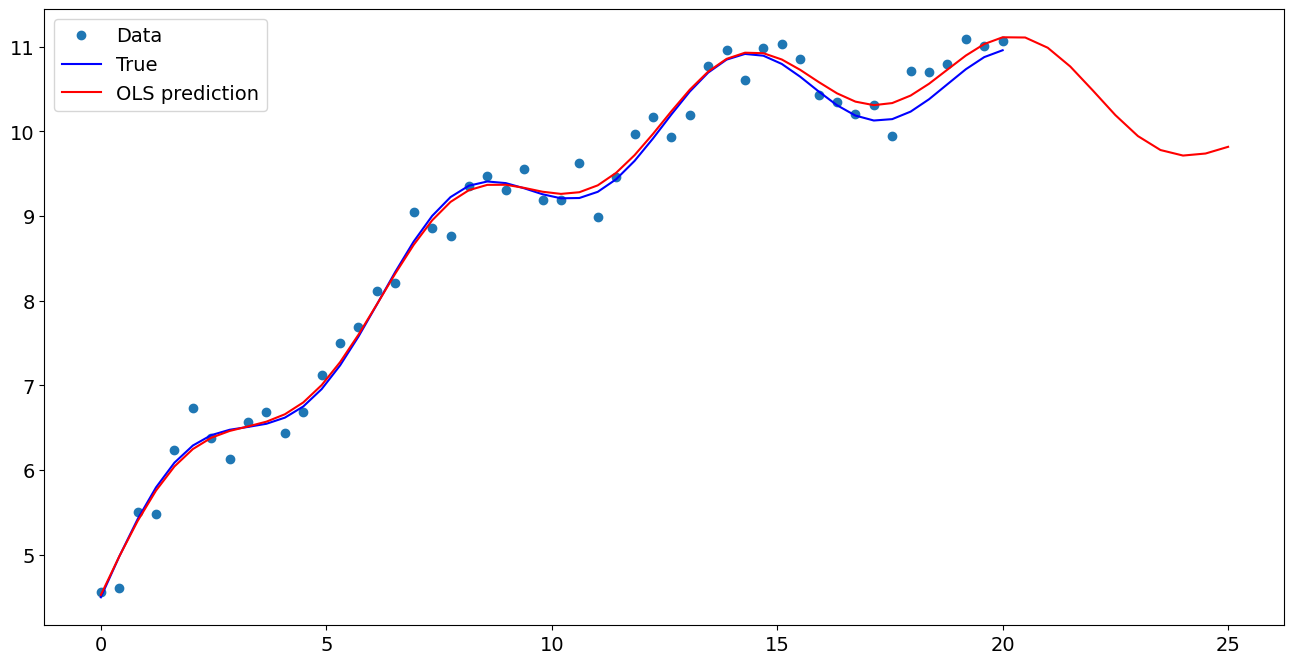

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.000936
x1                  0.498516
np.sin(x1)          0.445428
I((x1 - 5) ** 2)   -0.018971
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.106778
1    10.985898
2    10.764290
3    10.481762
4    10.190713
5     9.943308
6     9.778704
7     9.713461
8     9.737492
9     9.816529
dtype: float64